<a href="https://colab.research.google.com/github/onionminion/sgd-music-cifar/blob/main/CS_5787_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 5787 Deep Learning HW 2
## Sooyeon Kim (sk2696)

# Problem 1 - Linear Algebra Review #1

## Part 1

$$\texttt{Trace}(A) = 1 + (-2) = -1$$

## Part 2

\begin{align*}
    & BB^T = 
    \begin{pmatrix}
        1 & 0 & 0\\
        2 & 0 & 2
    \end{pmatrix}
    \begin{pmatrix}
        1 & 2\\
        0 & 0\\
        0 & 2
    \end{pmatrix}
    =
    \begin{pmatrix}
        1 & 2 \\
        2 & 8 
    \end{pmatrix}
\end{align*}
$$\texttt{Trace}(BB^T) = 1 + 8 = 9$$

# Problem 2 - Linear Algebra Review #2

\begin{align*}
    & x^T(A + D) = b^T \\
    & (x^T(A+D))^T = (b^T)^T\\
    & (A+D)^T(x^T)^T = b \\
    & (A+D)^Tx = b \\
    & ((A+D)^T)^{-1}(A+D)^T x= ((A+D)^T)^{-1}b\\
    & x = ((A+D)^T)^{-1}b
\end{align*}

# Problem 3 - Linear Algebra Review #3

## Part 1

$n \times m$

## Part 2

Not possible

# Problem 4 - Regression

## Part 1: Load and Explore the Data

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Deep Learning")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'CS 5787 HW1.ipynb'   iris-test.txt    YearPredictionMSD.txt
'CS 5787 HW2.ipynb'   iris-train.txt


In [ ]:
import numpy as np

def loadMusicData(fname, addBias):
    arr = np.loadtxt(fname, delimiter=",")
    if addBias:
        bias = np.ones((len(arr), 1))
        arr = np.append(arr, bias, axis=1)
    train = arr[:463714]
    test = arr[463714:]
    return train[:,0], train[:,1:], test[:,0], test[:,1:]

In [ ]:
def musicMSE(pred, gt):
    n = len(gt)
    rounded_pred = np.round(pred)
    sum = np.sum((gt - rounded_pred) ** 2)
    return sum / n

In [ ]:
trainYears, trainFeat, testYears, testFeat = loadMusicData("YearPredictionMSD.txt", True)

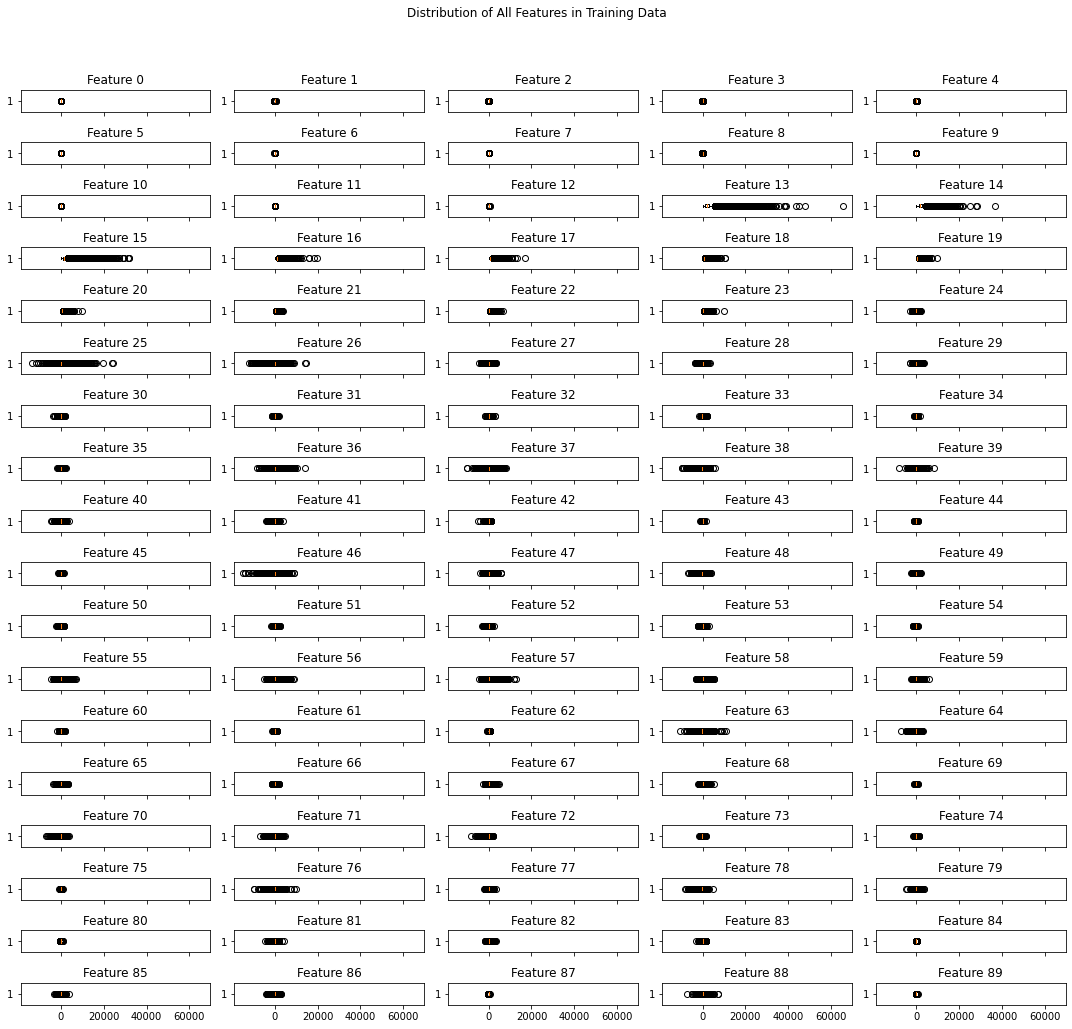

In [ ]:
import matplotlib.pyplot as plt

nrows = 18
ncols = 5
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15), sharex=True)
for row in range(nrows):
    for col in range(ncols):
        index = row * 5 + col
        ax[row, col].boxplot(trainFeat[:, index], vert=False)
        ax[row, col].set_title('Feature ' + str(index))

fig.suptitle("Distribution of All Features in Training Data")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
print("Feature 0 Range:", trainFeat[:, 0].max() - trainFeat[:, 0].min())
print("Feature 13 Range:", trainFeat[:, 13].max() - trainFeat[:, 13].min())
print("All Feature Range:", trainFeat.max() - trainFeat.min())

Feature 0 Range: 60.22114
Feature 13 Range: 65727.30533
All Feature Range: 80597.47488


The above box plots show the distribution of each feature in the training data. We could see that the distribution of the datapoints for each of the features differs significantly. For instance, the range of the datapoints in feature 0 is ~60 while the range of the datapoints in feature 13 is ~65,000. Because of this significant difference in range among the features, it is important to normalize these features by z-score normalization so that each feature is considered equally for our models. The overall range across all the features is ~80597.

In [ ]:
# Z-score normalization for features
train_mean = np.mean(trainFeat[:, :90], axis=0)
train_std = np.std(trainFeat[:, :90], axis=0)
normedTrainFeat = (trainFeat[:, :90] - train_mean) / train_std
normedTestFeat = (testFeat[:, :90] - train_mean) / train_std

# Add back biases if there were any
if trainFeat.shape[1] == 91:
    bias_train = trainFeat[:, -1].reshape(trainFeat.shape[0], 1)
    bias_test = testFeat[:, -1].reshape(testFeat.shape[0], 1)
    normedTrainFeat = np.append(normedTrainFeat, bias_train, axis=1)
    normedTestFeat = np.append(normedTestFeat, bias_test, axis=1)

In [ ]:
from scipy import stats

most_common_year = stats.mode(trainYears, axis=None, keepdims=False)[0]
print("Years")
print("Mean:", np.mean(trainYears))
print("Median:", np.median(trainYears))
print("Mode", most_common_year)
print("Maximum:", trainYears.max())
print("Minimum:", trainYears.min())
print("Range:", trainYears.max() - trainYears.min())

Years
Mean: 1998.386076331532
Median: 2002.0
Mode 2007.0
Maximum: 2011.0
Minimum: 1922.0
Range: 89.0


The training dataset covers the span of 90 years, from 1922 to 2011. The mode of the years is 2007.  

In [ ]:
pred_trivial = np.zeros(testYears.shape[0]) + most_common_year
musicMSE(pred_trivial, testYears)

190.08239236117836

If a classifier alwasys outputs the year 2007, which is the most common year in the training dataset, the test mean squared error (MSE) would be equal to ~190.

## Part2: Classification?

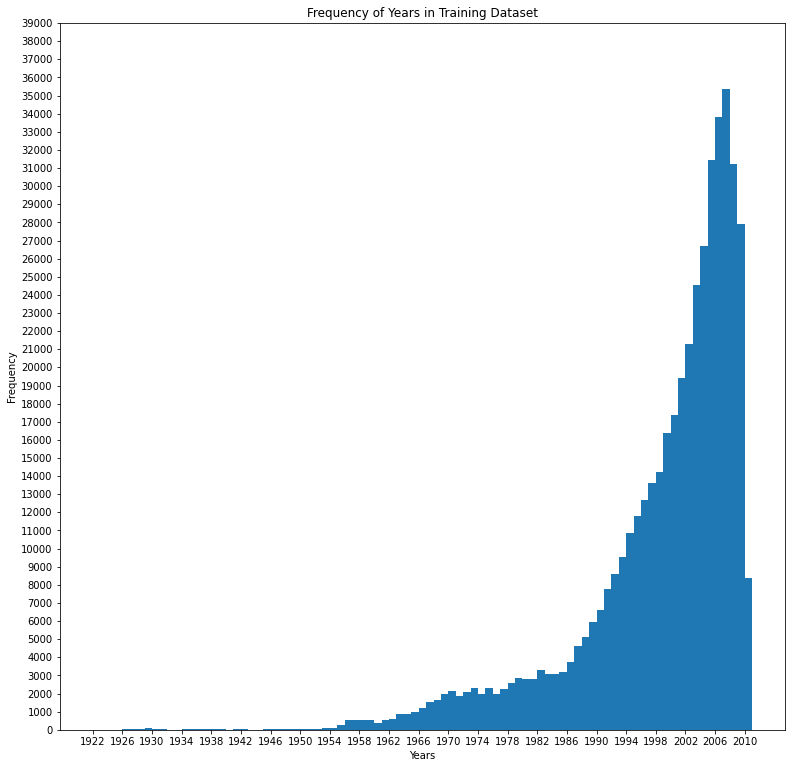

In [ ]:
plt.figure(figsize=(13,13))
plt.hist(trainYears, bins=range(1922, 2012))
plt.xlabel('Years')
plt.xticks(range(1922, 2012, 4))
plt.yticks(range(0, 40000, 1000))
plt.ylabel('Frequency')
plt.title('Frequency of Years in Training Dataset')
plt.show()

It would be problematic to treat this problem as a classification problem because some years are more common than other years. As shown in the histogram above that plots the frequency of years in the training dataset, the distribution of the years is skewed to the left, meaning that there are more data available for the recent years. More specifically, there are about 36,000 datapoints for the year 2007 while there are less than 100 datapoints for the year 1922. If the classifier always outputs the year 2007, then the accuracy of the classifier would depend only on the number of datapoints for the year 2007 in the dataset and it would be able to achieve a high accuracy, which could be misleading. 

## Part 3: Implementing Ridge (Tikhonov) Regression

In [ ]:
def L2_regularization_term(w, alpha):
    return alpha * np.sum(w ** 2)

In [ ]:
def ridge_gradient(X, y, alpha, w, n):
    return (2/n) * (X.T @ (X @ w - y)) + 2 * alpha * w

In [ ]:
def L1_regularization_term(w, alpha):
    return alpha * np.sum(np.abs(w))

In [ ]:
def lasso_gradient(X, y, alpha, w, n):
    return (2/n) * (X.T @ (X @ w - y)) + alpha * np.abs(w)

In [ ]:
def sgd_mini_batches(X_train, y_train, X_test, y_test, max_epochs, batch_size, learning_rate, alpha, loss_type, 
                     weight_decay_form, threshold):
    n = X_train.shape[0]
    m = X_train.shape[1]
    w = np.random.randn((m))

    prev_train_loss = None
    total_train_loss = None

    gradient_func = None
    reg_term = None

    train_losses = []
    test_losses = []

    # Change activation function and regularization term based on given loss_type and weight_decay_form
    if weight_decay_form == 'L2':
        reg_term = L2_regularization_term 
        if loss_type == 'L2':
            gradient_func = ridge_gradient
    elif weight_decay_form == 'L1':
        reg_term = L1_regularization_term
        if loss_type == 'L2':
            gradient_func = lasso_gradient

    # Iterate through each epoch
    for epoch in range(max_epochs):
        rand_indices = np.random.permutation(n)
        X_random = X_train[rand_indices]
        y_random = y_train[rand_indices]

        for i in range(0, n, batch_size):
            X_batch = X_random[i:i+batch_size]
            y_batch = y_random[i:i+batch_size]
            gradient = gradient_func(X_batch, y_batch, alpha, w, batch_size)
            w -= learning_rate * gradient

        # Calculate losses for current w for train
        total_train_loss = musicMSE(X_train @ w, y_train)
        total_train_loss += reg_term(w[:-1], alpha)
        train_losses.append(total_train_loss)

        # Save test losses so that they can be plotted (not used for updating weights)
        total_test_loss = musicMSE(X_test @ w, y_test)
        total_test_loss += reg_term(w[:-1], alpha)
        test_losses.append(total_test_loss)

        # Loss has increased so decrease learning rate
        if prev_train_loss and prev_train_loss < total_train_loss:
            learning_rate *= 0.8
        # Loss has converged so stop
        elif prev_train_loss and prev_train_loss - total_train_loss < threshold:
            break
        prev_train_loss = total_train_loss

    return w, train_losses, test_losses

In [ ]:
max_epoch = 300
batch_size = 64
lr = 0.05
alpha = 0.001
w_ridge_sgd, ridge_train_losses, ridge_test_losses = sgd_mini_batches(normedTrainFeat, trainYears, normedTestFeat, 
                                                                      testYears, max_epoch, batch_size, lr, alpha, 'L2', 
                                                                      'L2', 1e-5)

In [ ]:
ridge_sgd_train_MSE = musicMSE(normedTrainFeat @ w_ridge_sgd, trainYears)
ridge_sgd_test_MSE = musicMSE(normedTestFeat @ w_ridge_sgd, testYears)

In [ ]:
def ridge_pseudoinverse(X, y, alpha):
    n = X.T.shape[0]
    return (np.linalg.inv(X.T @ X + alpha * np.identity(n)) @ X.T) @ y

In [ ]:
w_pseudoinverse = ridge_pseudoinverse(normedTrainFeat, trainYears, alpha)
ridge_pseudoinverse_train_MSE = musicMSE(normedTrainFeat @ w_pseudoinverse, trainYears)
ridge_pseudoinverse_test_MSE = musicMSE(normedTestFeat @ w_pseudoinverse, testYears)

In [ ]:
print('Ridge Regression SGD with mini batches:')
print('-Train data MSE:', ridge_sgd_train_MSE)
print('-Test data MSE:', ridge_sgd_test_MSE)

print('\nRidge Regression Pseudoinverse Solution:')
print('-Train data MSE:', ridge_pseudoinverse_train_MSE)
print('-Test data MSE:', ridge_pseudoinverse_test_MSE)

Ridge Regression SGD with mini batches:
-Train data MSE: 95.33124943391832
-Test data MSE: 94.60746450775697

Ridge Regression Pseudoinverse Solution:
-Train data MSE: 91.34578856795352
-Test data MSE: 90.5480815788964


The MSE for the pseudoinverse solution seems to be slightly lower than that of the SGD process. The training and test MSE for the SGD is around 95 while that of the pseudoinverse solution is around 91. 

In [ ]:
def compare_weights(w1, w2, title1, title2, range): 
    fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
    axes[0].hist(w1, range=range, bins=10)
    axes[1].hist(w2, range=range, bins=10)
    axes[0].set_xlabel('Weights', fontsize=15)
    axes[1].set_xlabel('Weights', fontsize=15)
    axes[0].set_ylabel('Frequency', fontsize=15)
    axes[0].set_title(title1, fontsize=17)
    axes[1].set_title(title2, fontsize=17)
    plt.show()

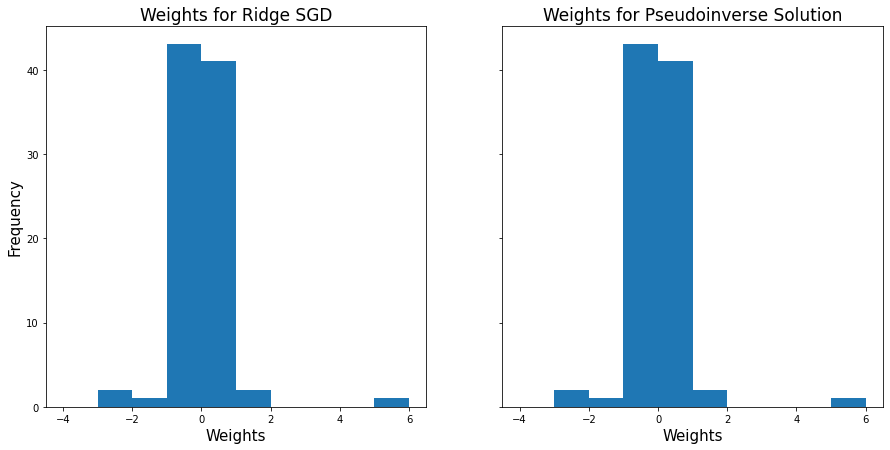

In [ ]:
compare_weights(w_ridge_sgd[:-1], w_pseudoinverse[:-1], 'Weights for Ridge SGD', 'Weights for Pseudoinverse Solution', 
                (-4, 6))

To compare the weights found by ridge regression SGD and the weights computed by the pseudoinverse solution, I plotted histograms that show the frequency of each interval of weights. Because the distribution of the two histograms looks exactly the same, we can conclude that the weights don't differ by much.

In [ ]:
def plot_train_test(train_data, test_data, title, ylabel, ax, legend_loc="upper right"):
    epochs = range(len(train_data))
    ax.plot(epochs, train_data)
    ax.plot(epochs, test_data)
    ax.set_title(title + str(len(train_data)) + ' Epochs', fontsize=17)
    ax.set_xlabel('Epoch', fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.legend(["Train", "Test"], loc=legend_loc)
    return fig, ax

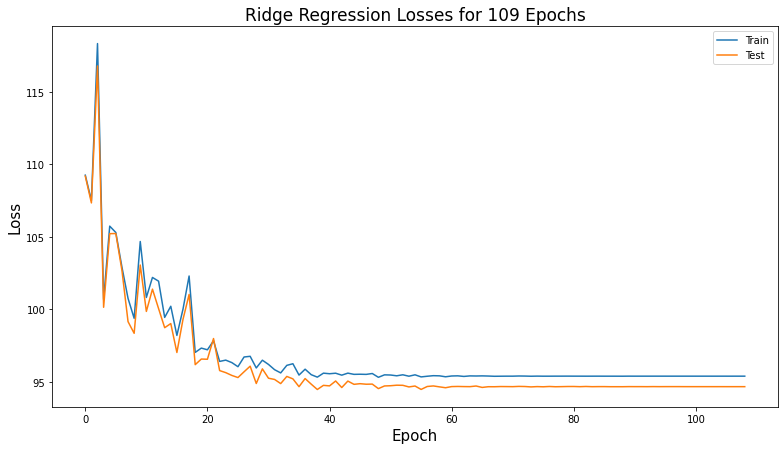

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
plot_train_test(ridge_train_losses, ridge_test_losses, 'Ridge Regression Losses for ', 'Loss', ax)
plt.show()

## Part 4: Implementing L1 Weight Decay

In [ ]:
max_epoch = 300
batch_size = 128
lr = 0.07
alpha = 0.001
w_lasso_sgd, lasso_train_losses, lasso_test_losses = sgd_mini_batches(normedTrainFeat, trainYears, normedTestFeat, 
                                                                      testYears, max_epoch, batch_size, lr, alpha, 'L2', 
                                                                      'L1', 1e-5)

In [ ]:
lasso_sgd_train_MSE = musicMSE(normedTrainFeat @ w_lasso_sgd, trainYears)
lasso_sgd_test_MSE = musicMSE(normedTestFeat @ w_lasso_sgd, testYears)

print('Lasso Regression SGD with mini batches:')
print('-Train data MSE:', lasso_sgd_train_MSE)
print('-Test data MSE:', lasso_sgd_test_MSE)

Lasso Regression SGD with mini batches:
-Train data MSE: 92.3449022457808
-Test data MSE: 91.58211152214754


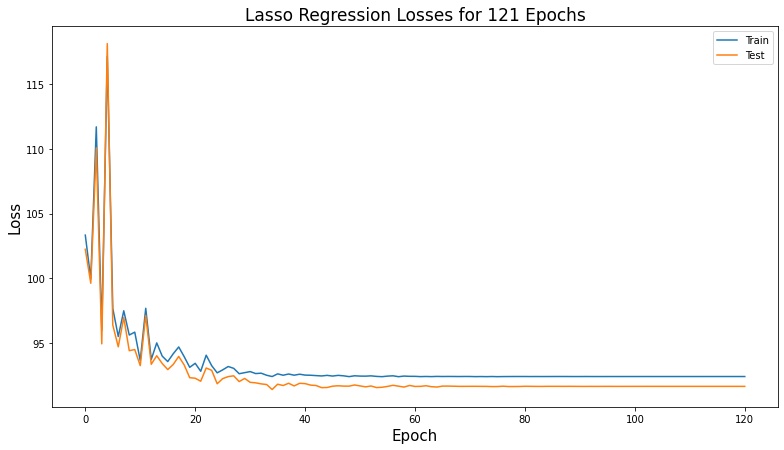

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
plot_train_test(lasso_train_losses, lasso_test_losses, 'Lasso Regression Losses for ', 'Loss', ax)
plt.show()

## Part 6: Model Comparison

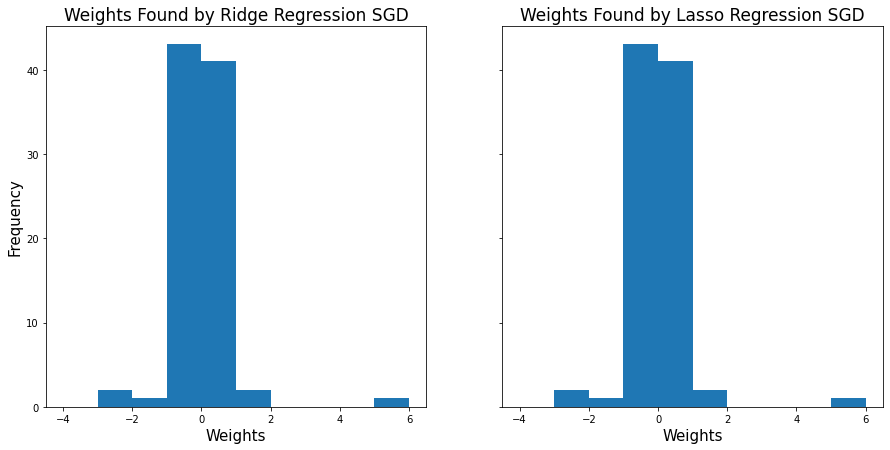

In [ ]:
compare_weights(w_ridge_sgd[:-1], w_lasso_sgd[:-1], 'Weights Found by Ridge Regression SGD', 
                'Weights Found by Lasso Regression SGD', (-4, 6))

To compare the weights found by ridge regression SGD and the weights found by the lasso regression SGD, I plotted histograms that show the frequency of each interval of weights. Because the distribution of the two histograms looks exactly the same, we can conclude that the weights for the two models don't differ by much.

In [ ]:
print('Ridge Regression SGD with mini batches:')
print('-Train data MSE:', ridge_sgd_train_MSE)
print('-Test data MSE:', ridge_sgd_test_MSE)

print('\nLasso Regression SGD with mini batches:')
print('-Train data MSE:', lasso_sgd_train_MSE)
print('-Test data MSE:', lasso_sgd_test_MSE)

Ridge Regression SGD with mini batches:
-Train data MSE: 95.33124943391832
-Test data MSE: 94.60746450775697

Lasso Regression SGD with mini batches:
-Train data MSE: 92.3449022457808
-Test data MSE: 91.58211152214754


The training MSE and test MSE for ridge regression are around 95 while those of lasso regression are around 92. We can conclude that lasso regression model performs slightly better than the ridge regression model. 

In [ ]:
ridge_pred = normedTestFeat @ w_ridge_sgd
lasso_pred = normedTestFeat @ w_lasso_sgd

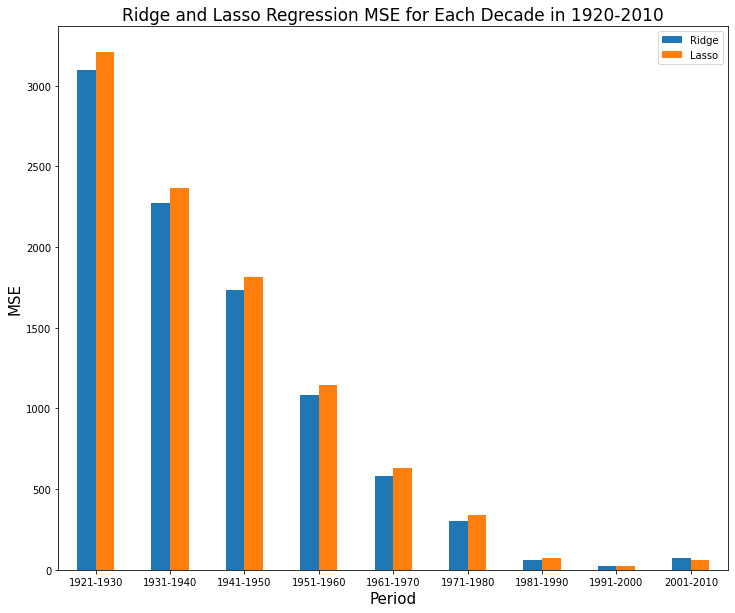

In [ ]:
import pandas as pd

ridge_lasso_MSE = {'Period': [], 'Ridge': [], 'Lasso': []}

for year in range(1920, 2010, 10):
    start = year + 1
    end = year + 10
    decade = (testYears >= start) & (testYears <= end)
    indices = np.where(decade)[0]

    ridge_MSE = musicMSE(ridge_pred[indices], testYears[indices])
    lasso_MSE = musicMSE(lasso_pred[indices], testYears[indices])

    ridge_lasso_MSE['Period'].append(str(start) + '-' + str(end))
    ridge_lasso_MSE['Ridge'].append(ridge_MSE)
    ridge_lasso_MSE['Lasso'].append(lasso_MSE)


df = pd.DataFrame(data=ridge_lasso_MSE)
df.plot.bar(x='Period', y=['Ridge', 'Lasso'], figsize=(12,10), rot=0)
plt.xlabel("Period", fontsize=15)
plt.ylabel("MSE", fontsize=15)
plt.title('Ridge and Lasso Regression MSE for Each Decade in 1920-2010', fontsize=17)
plt.show()

The bar graph above illustrates that ridge regression had lower MSE than lasso regression for most ranges of years. For example, the MSE for ridge regression is lower than that of lasso regression for 70 years (1921 to 1990). However, the MSE for ridge is greater than that of lasso from 2001 to 2010. This means that the ridge regression model performs better than the lasso regression model for the years from 1921 to 1990, while the lasso regression model performs better than the ridge mdoel for the years from 2001 to 2010. Since there were more data for the years 2001 to 2010 than the rest of the years, the overall performance is different from range-specific performance. 

The bar graph also shows that the largest errors occur for the earliest years (1921-1930). This is probably because there were limited training data available for these years.

In [ ]:
max_epoch = 300
batch_size = 64
lr = 0.05
alpha = 0
w_ridge_noreg, ridge_train_losses, ridge_test_losses = sgd_mini_batches(normedTrainFeat, trainYears, normedTestFeat, 
                                                                        testYears, max_epoch, batch_size, lr, alpha, 
                                                                        'L2', 'L2', 1e-5)

In [ ]:
max_epoch = 300
batch_size = 128
lr = 0.07
alpha = 0
w_lasso_noreg, lasso_train_losses_noreg, lasso_test_losses_noreg = sgd_mini_batches(normedTrainFeat, trainYears, 
                                                                                    normedTestFeat,  testYears, 
                                                                                    max_epoch, batch_size, lr, alpha, 
                                                                                    'L2', 'L1', 1e-5)

In [ ]:
ridge_noreg_train_MSE = musicMSE(normedTrainFeat @ w_ridge_noreg, trainYears)
ridge_noreg_test_MSE = musicMSE(normedTestFeat @ w_ridge_noreg, testYears)

print('Ridge Regression without regularization:')
print('-Train data MSE:', ridge_noreg_train_MSE)
print('-Test data MSE:', ridge_noreg_test_MSE)

print('\nRidge Regression with regularization:')
print('-Train data MSE:', ridge_sgd_train_MSE)
print('-Test data MSE:', ridge_sgd_test_MSE)

Ridge Regression without regularization:
-Train data MSE: 91.34534648511799
-Test data MSE: 90.54666769963781

Ridge Regression with regularization:
-Train data MSE: 95.33124943391832
-Test data MSE: 94.60746450775697


To see the effect of regularization on the ridge regression model, I ran the models again without regularization by making the weight decay factor equal to 0. The training and test data MSE for the ridge regression model without regularization are \~91 while those of the model with L2 regularization are \~95. Since the mean squared error for the model with regularization is slighlty higher than the one without regularization, we can conclude that regularization did not really help. 



In [ ]:
lasso_noreg_train_MSE = musicMSE(normedTrainFeat @ w_lasso_noreg, trainYears)
lasso_noreg_test_MSE = musicMSE(normedTestFeat @ w_lasso_noreg, testYears)

print('Lasso Regression without regularization:')
print('-Train data MSE:', lasso_noreg_train_MSE)
print('-Test data MSE:', lasso_noreg_test_MSE)

print('\nLasso Regression with regularization:')
print('-Train data MSE:', lasso_sgd_train_MSE)
print('-Test data MSE:', lasso_sgd_test_MSE)

Lasso Regression without regularization:
-Train data MSE: 91.34552978775712
-Test data MSE: 90.5471906412814

Lasso Regression with regularization:
-Train data MSE: 92.3449022457808
-Test data MSE: 91.58211152214754


To see the effect of regularization on the lasso regression model, I ran the models again without regularization by making the weight decay factor equal to 0. The training and test data MSE for the lasso regression model without regularization are \~91 while those of the model with L2 regularization are \~92. Since the mean squared error for the model with regularization is slighlty higher than the one without regularization, we can conclude that regularization did not really help for the lasso regression model as well.

# Problem 5 - Softmax Properties

## Part 1

Show that the softmax function is invariant to constant offsets to its input.

\begin{equation*}
\operatorname{softmax}(\mathbf{a}+c\mathbf{1}) = \operatorname{softmax}(\mathbf{a}) \\
\frac{{\exp \left( {\mathbf{a} + c\mathbf{1}} \right)}}{{\sum\nolimits_{j = 1}^K {\exp \left( {a_j + c\mathbf{1}} \right)} }} 
= \frac{{\exp \left( {\mathbf{a}} \right)}}{{\sum\nolimits_{j = 1}^K {\exp \left( {a_j } \right)} }} \\
\frac{{\exp \left( {\mathbf{a}} \right) \cdot \exp \left( {c\mathbf{1}} \right)}}{{\sum\nolimits_{j = 1}^K {\exp \left( {a_j} \right)\cdot \exp\left(c\mathbf{1}\right)} }} 
= \frac{{\exp \left( {\mathbf{a}} \right)}}{{\sum\nolimits_{j = 1}^K {\exp \left( {a_j} \right)} }} \\
\frac{{\exp \left( {\mathbf{a}} \right) \cdot \exp \left( {c\mathbf{1}} \right)}}{\exp\left(c\mathbf{1}\right)\cdot {\sum\nolimits_{j = 1}^K {\exp \left( {a_j } \right)} }} 
= \frac{{\exp \left( {\mathbf{a}} \right)}}{{\sum\nolimits_{j = 1}^K {\exp \left( {a_j } \right)} }} \\
\frac{{\exp \left( {\mathbf{a}} \right) }}{{\sum\nolimits_{j = 1}^K {\exp \left( {a_j } \right)} }} 
= \frac{{\exp \left( {\mathbf{a}} \right)}}{{\sum\nolimits_{j = 1}^K {\exp \left( {a_j } \right)} }} \\
\end{equation*}


## Part 2

Since the softmax function involves exponential functions, the output could grow exponentially large if the input values are large. Therefore, it is essential to keep the input values small enough so that it does not result in an overflow error. We can keep the values small enough by subtracting a constant from all elements across the input matrix. We are allowed to do this because we have just proved that softmax function is invariant to constant offsets to its input above.


# Problem 6 - Implementing a Softmax Classifier

## Part 1: Implementation & Evaluation

In [ ]:
def load_iris_data(fname):
    arr = np.loadtxt(fname, delimiter=" ")
    return arr[:,0], arr[:, 1:]

In [ ]:
def add_bias(data):
    bias = np.ones((len(data), 1))
    return np.append(data, bias, axis=1)

In [ ]:
y_train, X_train = load_iris_data('iris-train.txt')
y_test, X_test = load_iris_data('iris-test.txt')

In [ ]:
def one_hot_encode(y, classes):
    result = np.zeros((y.shape[0], len(classes)))
    for i in range(y.shape[0]):
        for j in range(len(classes)):
            if y[i] == classes[j]:
                result[i][j] = 1
    return result

In [ ]:
# Normalize data
train_mean = np.mean(X_train, axis=0)
normed_X_train = X_train - train_mean
normed_X_test = X_test - train_mean

# Add bias
normed_X_train = add_bias(normed_X_train)
normed_X_test = add_bias(normed_X_test)

#Classes now start with 0
y_train -= 1
y_test -= 1

In [ ]:
def softmax(X):
    max = np.max(X, axis=1).reshape(-1, 1)
    exp = np.exp(X - max)
    sum = np.sum(exp, axis=1).reshape(-1, 1)
    return exp / sum

In [ ]:
def cross_entropy(prob_pred, gt, classes):
    n = prob_pred.shape[0]
    one_hot_encoded_gt = one_hot_encode(gt, classes)
    y_log_yhat = np.multiply(one_hot_encoded_gt, np.log(prob_pred))
    return -np.sum(y_log_yhat) / n

In [ ]:
def cross_entropy_gradient(X, y, w, reg_term, alpha, classes):
    n = y.shape[0]
    z = X @ w
    y_pred = softmax(z)
    dz_dw = X.T
    dL_dz = y_pred - one_hot_encode(y, classes)
    dL_dw = dz_dw @ dL_dz
    if reg_term == 'L2':
        dL_dw += alpha * w
    return dL_dw

In [ ]:
from sklearn.metrics import confusion_matrix

def mean_per_class_accuracy(pred, gt):
    matrix = confusion_matrix(gt, pred)
    return np.mean(matrix.diagonal() / np.sum(matrix, axis=1))

In [ ]:
def sgd_softmax(X_train, y_train, X_test, y_test, max_epochs, batch_size, learning_rate, alpha,  weight_decay_form, 
                classes, momentum_rate=0):
    n = X_train.shape[0]
    m = X_train.shape[1]
    k = len(classes)
    w = np.random.normal(size=(m, k))
    momentum = np.zeros((m, k))

    prev_train_loss = None
    total_train_loss = None
    reg_term = None

    train_losses = []
    test_losses = []
    train_accuracy = []
    test_accuracy = []

    if weight_decay_form == 'L2':
        reg_term = L2_regularization_term
    elif weight_decay_form == 'L1':
        reg_term = L1_regularization_term

    for epoch in range(max_epochs):
        rand_indices = np.random.permutation(n)
        X_random = X_train[rand_indices]
        y_random = y_train[rand_indices]
        for i in range(0, n, batch_size):
            X_batch = X_random[i:i+batch_size]
            y_batch = y_random[i:i+batch_size]
            gradient = cross_entropy_gradient(X_batch, y_batch, w, weight_decay_form, alpha, classes)
            momentum = momentum_rate * momentum + learning_rate * gradient
            w -= momentum
        
        # Calculate loss and accuracy for current w for train
        total_train_loss = cross_entropy(softmax(X_train @ w), y_train, classes) + reg_term(w[:-1], alpha)
        train_losses.append(total_train_loss)
        train_pred = softmax(X_train @ w).argmax(axis=1)
        train_accuracy.append(mean_per_class_accuracy(train_pred, y_train))
        
        # Loss has increased
        if prev_train_loss and prev_train_loss < total_train_loss:
            learning_rate *= 0.8
        prev_train_loss = total_train_loss

        # Calculate loss and accuracy for current w for test (not used for updating weights)
        total_test_loss = cross_entropy(softmax(X_test @ w), y_test, classes) + reg_term(w[:-1], alpha)
        test_losses.append(total_test_loss)
        test_pred = softmax(X_test @ w).argmax(axis=1)
        test_accuracy.append(mean_per_class_accuracy(test_pred, y_test))
    return w, train_losses, test_losses, train_accuracy, test_accuracy

In [ ]:
alpha = 0.001
max_epoch = 1000
batch_size = 16
lr = 0.001
classes = range(3)
momentum_rate = 0.6
w, sm_train_losses, sm_test_losses, sm_train_accuracy, sm_test_accuracy = sgd_softmax(normed_X_train, y_train, 
                                                                                      normed_X_test, y_test, max_epoch,
                                                                                      batch_size, lr, alpha, 'L2', 
                                                                                      classes, momentum_rate)

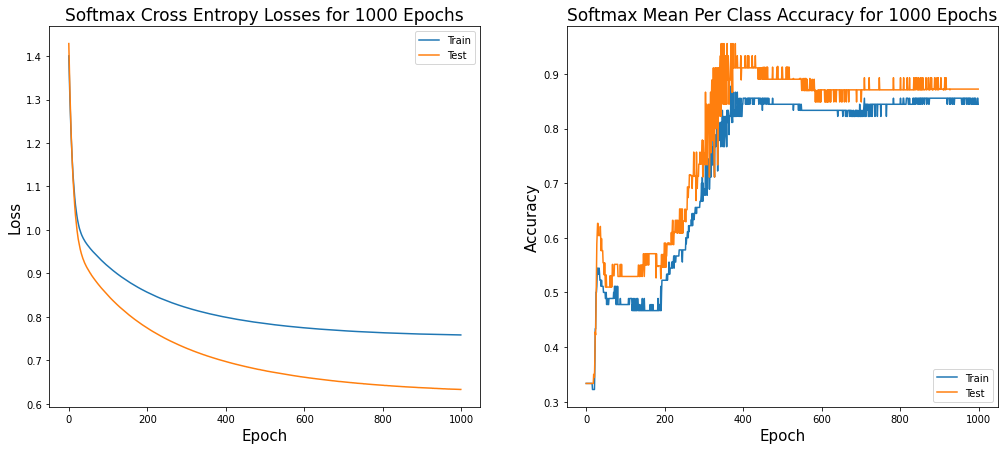

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 7))
plot_train_test(sm_train_losses, sm_test_losses, 'Softmax Cross Entropy Losses for ', 'Loss', ax1)
plot_train_test(sm_train_accuracy, sm_test_accuracy, 'Softmax Mean Per Class Accuracy for ', 'Accuracy', ax2,
                      'lower right')
plt.show()

In [ ]:
print('Best Accuracy Achieved By Model:')
sm_test_accuracy[-1]

Best Accuracy Achieved By Model:


0.8722222222222222

The best accuracy achieved by tuning the model was 0.872. The hyperparameters for the model are the following:


*  weight decay factor = 0.001
*  batch_size = 16
*  learning rate = 0.001
*  momentum_rate = 0.6


Early stopping could have imporved the accuracy in the test set. From the graph on the right, we can see that the test accuracy reaches 0.95 at around epoch 320 and after that the accuracy decreases a bit and fluctuates between 0.85 and 0.89. 

## Part 2: Displaying Decision Boundaries

Code used as a reference: https://github.com/kuleshov/cornell-cs5785-2022-applied-ml/blob/main/lecture-notes/lecture4-classification.ipynb

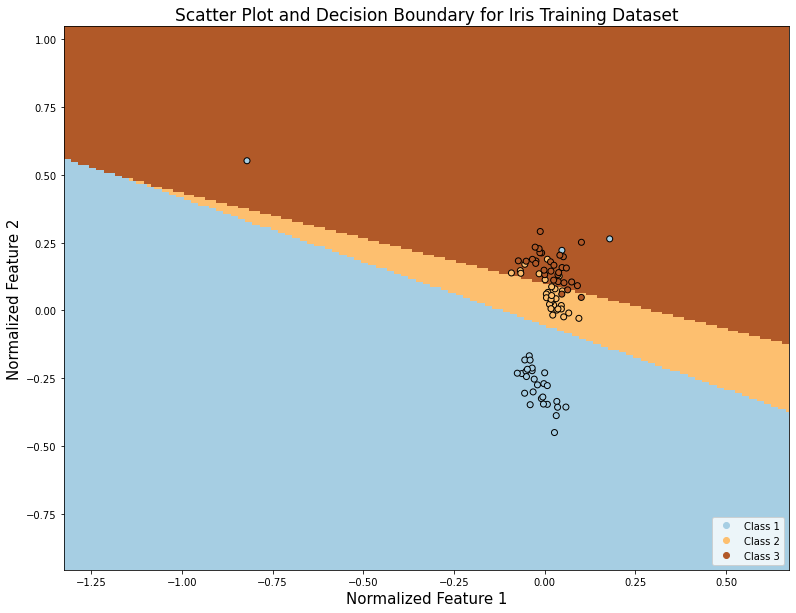

In [ ]:
X = normed_X_train[:,:2]
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

Z = softmax(np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape)] @ w)
Z = Z.argmax(axis=1) + 1
Z = Z.reshape(xx.shape)

plt.figure(figsize=(13,10))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
p1 = plt.scatter(normed_X_train[:,0], normed_X_train[:,1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.legend(handles=p1.legend_elements()[0], labels=['Class 1', 'Class 2', 'Class 3'], loc='lower right')
plt.title('Scatter Plot and Decision Boundary for Iris Training Dataset', fontsize=17)
plt.xlabel('Normalized Feature 1', fontsize=15)
plt.ylabel('Normalized Feature 2', fontsize=15)
plt.show()

# Problem 7 - Classifying Images

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

# load the training dataset from cifar10 dataset 
dataset = load_dataset("cifar10")
cifar_X_train = dataset['train']['img']
cifar_y_train = dataset['train']['label']

cifar_X_test = dataset['test']['img']
cifar_y_test = dataset['test']['label']

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
dim = np.asarray(cifar_X_train[0]).shape
dim

(32, 32, 3)

In [ ]:
def img_to_vector(data, dim):
    product = 1
    for i in dim:
        product *= i
    vector_size = (len(data), product)
    new_data = np.zeros(vector_size)
    for i in range(len(data)):
        new_data[i] = np.asarray(data[i]).flatten()
    return new_data

In [ ]:
cifar_X_train = img_to_vector(cifar_X_train, dim)
cifar_X_test = img_to_vector(cifar_X_test, dim)
cifar_X_train.shape

(50000, 3072)

In [ ]:
cifar_X_train /= 255
cifar_X_test /= 255

cifar_X_train = add_bias(cifar_X_train)
cifar_X_test = add_bias(cifar_X_test)

cifar_y_train = np.asarray(cifar_y_train)
cifar_y_test = np.asarray(cifar_y_test)

In [ ]:
alpha = 0.00001
max_epoch = 100
batch_size = 64
lr = 0.001
classes = range(10)
momentum_rate = 0
w, cifar_train_losses, cifar_test_losses, cifar_train_accuracy, cifar_test_accuracy = sgd_softmax(cifar_X_train, 
                                                                                                  cifar_y_train, 
                                                                                                  cifar_X_test, 
                                                                                                  cifar_y_test, 
                                                                                                  max_epoch, batch_size, 
                                                                                                  lr, alpha, 'L2',
                                                                                                  range(10), 0)

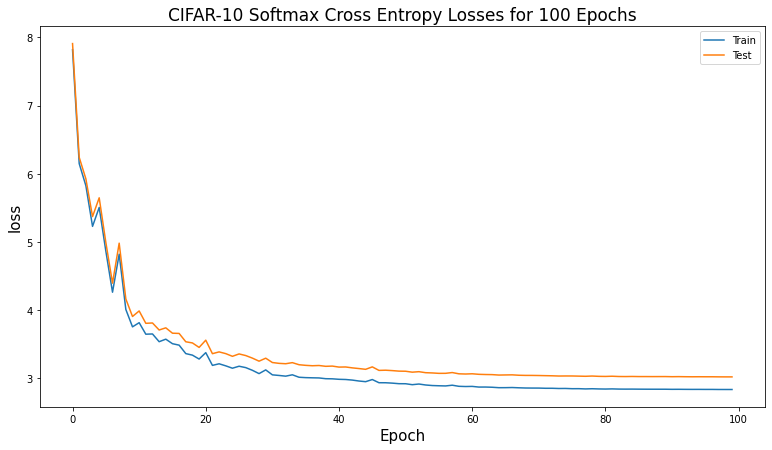

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
plot_train_test(cifar_train_losses, cifar_test_losses, 'CIFAR-10 Softmax Cross Entropy Losses for ', 'loss', ax)
plt.show()

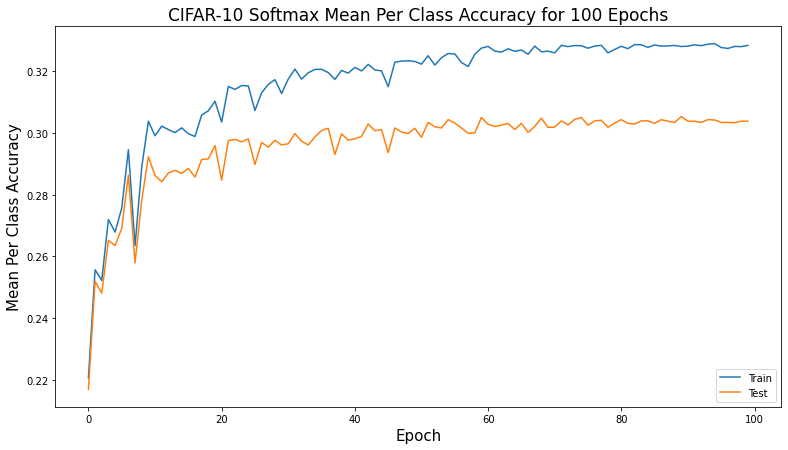

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
plot_train_test(cifar_train_accuracy, cifar_test_accuracy, 'CIFAR-10 Softmax Mean Per Class Accuracy for ', 
                'Mean Per Class Accuracy', ax, 'lower right')
plt.show()

In [ ]:
cifar_test_accuracy[-1]

0.3038

The final accuracy on the test data is \~0.3. The best hyperparameters for the model are the following:

*  weight decay factor = 0.00001
*  max_epoch = 100
*  batch size = 64
*  learning rate = 0.001
*  momentum rate = 0



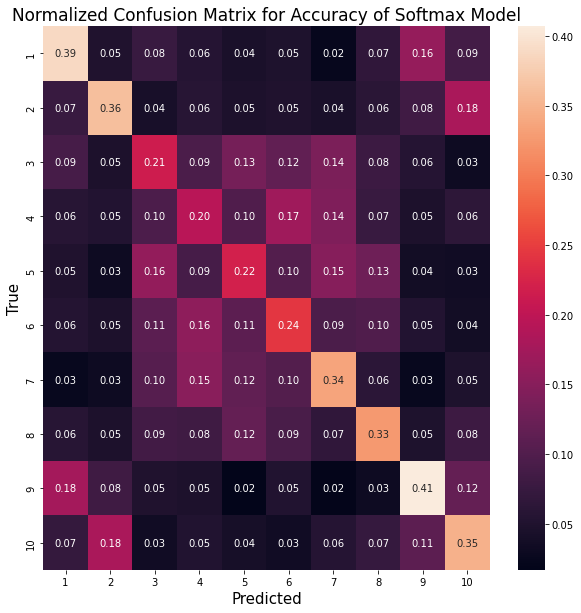

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_pred = softmax(cifar_X_test @ w).argmax(axis=1)
matrix = confusion_matrix(cifar_y_test, test_pred, normalize='true')

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='.2f', xticklabels=range(1,11), yticklabels=range(1,11))
plt.title('Normalized Confusion Matrix for Accuracy of Softmax Model', fontsize=17)
plt.ylabel('True', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show()